1. Create a 2D scatterplot with `pages` on the x-axis and `num_ratings` on the y-axis.

In [2]:
!pip install statsmodels==0.12.2

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
import scipy.stats as st
import statsmodels as sm
import matplotlib


In [53]:
df = pd.read_csv("preprocess_data.csv")
df=df.drop(['Unnamed: 0'],axis=1)


In [56]:
df.shape[0]

956

Data cleaning before Nan

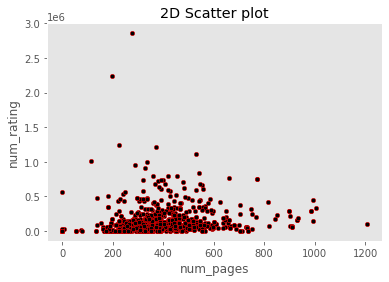

In [54]:
df.plot.scatter('num_pages' ,'num_rating',color = 'k', edgecolor = 'r')
plt.xlabel('num_pages')
plt.ylabel('num_rating')
plt.title('2D Scatter plot')
#plt.legend()
plt.grid()
plt.show()

2. Can you compute numerically the correlation coefficient of these two columns?

In [55]:
x=df['num_pages']
y=df['num_rating']
st.pearsonr(x, y)    # Pearson's r

(0.1356184197899446, 2.585711907202622e-05)

In [7]:
st.spearmanr(x, y)

SpearmanrResult(correlation=0.33264323580363264, pvalue=3.9248537090833536e-26)

In [8]:
st.kendalltau(x, y)

KendalltauResult(correlation=0.22928196475597376, pvalue=3.2236608073956275e-26)

In [9]:
df['num_pages'].corr(df['num_rating'])

0.1356184197899447

3. Visualise the `avg_rating` distribution.

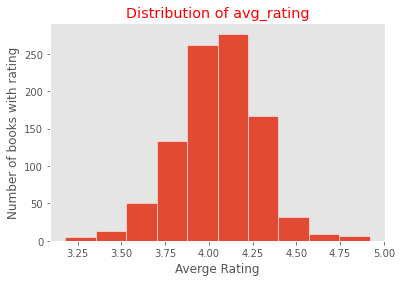

In [50]:
plt.hist(df.avg_rating, edgecolor = "white")
plt.xlabel("Averge Rating")
plt.ylabel("Number of books with rating")
plt.grid()
plt.title('Distribution of avg_rating', color='r')
plt.show()


4. Visualise the `minmax_norm_rating` distribution.

In [11]:
#minmax_norm_ratings
def minmax_norm(data_column_name):
    x = data_column_name
    mean_norm_ratings=1+((x-x.min())/(x.max()-x.min()))*9
    return mean_norm_ratings
minmax_norm_ratings = minmax_norm(df["avg_rating"])
#print(minmax_norm_ratings#)

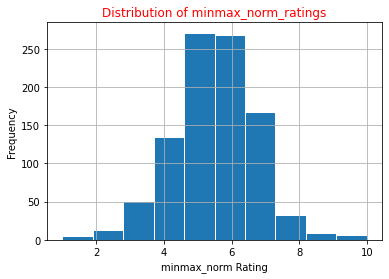

In [12]:
#Visualisation
plt.hist(minmax_norm_ratings, edgecolor = "white")
plt.xlabel("minmax_norm Rating")
plt.ylabel("Frequency")
plt.grid()
plt.title('Distribution of minmax_norm_ratings', color='r')
plt.show()



5. Visualise the `mean_norm_rating` distribution.

In [13]:
def mean_norm(data_column_name):
    x = data_column_name
    mean_norm_ratings=1+((x-x.mean())/(x.max()-x.min()))*9
    return mean_norm_ratings
mean_norm_ratings = mean_norm(df["avg_rating"])
#print(mean_norm_ratings)

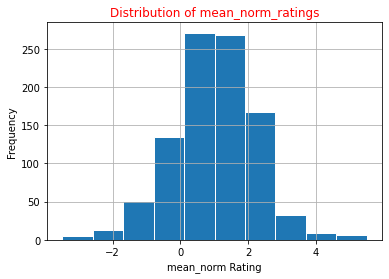

In [14]:
#Visualization
plt.hist(mean_norm_ratings, edgecolor = "white")
plt.xlabel("mean_norm Rating")
plt.ylabel("Frequency")
plt.grid()
plt.title('Distribution of mean_norm_ratings', color='r')
plt.show()

6. Create one graph that represents in the same figure both `minmax_norm_rating` and `mean_norm_rating`distributions.

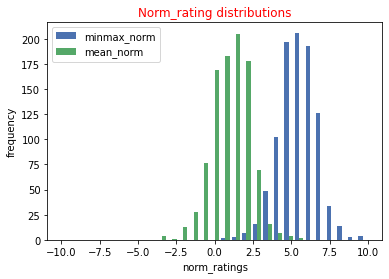

In [16]:
plt.style.use('seaborn-deep')

x = minmax_norm_ratings
y = mean_norm_ratings
bins = np.linspace(-10, 10, 30)

plt.hist([x, y], bins, label=['minmax_norm', 'mean_norm'])
plt.xlabel('norm_ratings')
plt.ylabel('frequency')
plt.title('Norm_rating distributions', color='red')
plt.legend(loc='upper left'minmax_norm_ratings)
plt.show()

7. What is the best fit in terms of a distribution (normal, chi-squared...) to represent each of those graphs? 
    - You can use `Scipy-Stats` [Library](https://docs.scipy.org/doc/scipy/reference/stats.html) to figure out the best fitting distribution like in this [example](https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python).

Text(0, 0.5, 'Frequency')

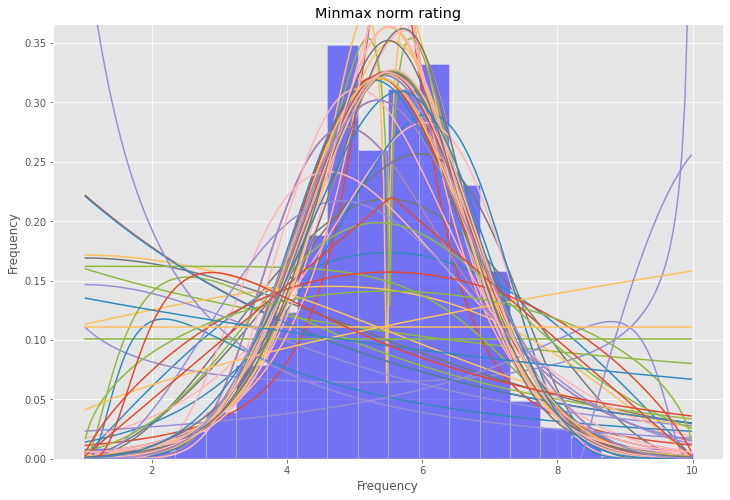

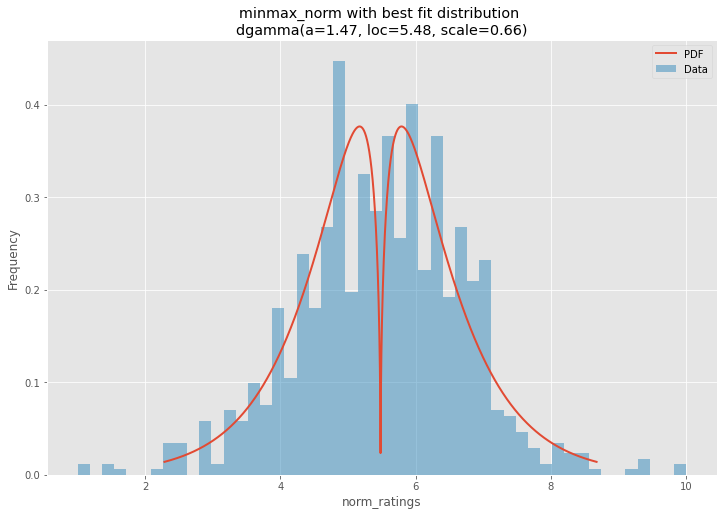

In [17]:


matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = preprocess_data.csv

# Plot for comparison
plt.figure(figsize=(12,8))
#ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
ax = df.minmax_norm_ratings.hist(bins=20, alpha=0.5, density=True, color='blue', edgecolor = 'white')
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(df.minmax_norm_ratings, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Minmax norm rating')
ax.set_xlabel(u'Frequency')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
df.minmax_norm_ratings.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'minmax_norm with best fit distribution \n' + dist_str)
ax.set_xlabel(u'norm_ratings')
ax.set_ylabel('Frequency')

In [18]:
df.head(10)

,title,author,num_rating,num_reviews,avg_rating,num_pages,original_publish_year,series,genres,award,minmax_norm_ratings,mean_norm_ratings
0,City of Ashes,Cassandra Clare,790027,30438,4.15,453,2008,True,"['Fantasy', 'Young Adult', 'Fantasy Paranormal...",2,6.02,1.53
1,"Hush, Hush",Becca Fitzpatrick,604902,25701,3.95,391,2009,True,"['Young Adult', 'Fantasy', 'Romance', 'Fantasy...",1,4.98,0.50
2,City of Glass,Cassandra Clare,834607,29071,4.30,541,2009,True,"['Fantasy', 'Young Adult', 'Fantasy Paranormal...",3,6.79,2.31
3,Clockwork Angel,Cassandra Clare,709807,33615,4.31,479,2010,True,"['Fantasy', 'Young Adult', 'Romance', 'Fantasy...",10,6.84,2.36
4,Marked,P.C. Cast,448105,14504,3.80,306,2007,True,"['Young Adult', 'Fantasy', 'Paranormal Vampire...",1,4.21,-0.28
5,Graceling,Kristin Cashore,405433,23013,4.07,471,2008,True,"['Fantasy', 'Young Adult', 'Romance', 'Fiction...",18,5.60,1.12
6,Shiver,Maggie Stiefvater,448203,23237,3.76,392,2009,True,"['Young Adult', 'Fantasy', 'Romance', 'Fantasy...",12,4.00,-0.49
7,Frostbite,Richelle Mead,324067,11587,4.26,327,2008,True,"['Young Adult', 'Paranormal Vampires', 'Fantas...",0,6.59,2.10
8,"I'd Tell You I Love You, But Then I'd Have to ...",Ally Carter,180538,7608,3.82,284,2006,True,"['Young Adult', 'Romance', 'Mystery', 'Contemp...",2,4.31,-0.18
9,Matched,Ally Condie,681163,33513,3.65,369,2010,True,"['Young Adult', 'Science Fiction Dystopia', 'R...",11,3.43,-1.06


In [19]:
df.groupby('author').size().reset_index(name='books')


,author,books
0,A.G. Howard,1
1,A.V. Davina,2
2,Abbi Glines,6
3,Abraham Verghese,2
4,Adam Glendon Sidwell,2
...,...,...
442,Wilbur Smith,2
443,William Gibson,1
444,William Paul Young,1
445,Yuehai Xiao,1


8. Visualize the `awards` distribution in a **boxplot** and **aggregated bars**. Decide which of these representations gives us more information and in which cases they should be used.

Text(0.5, 1.0, 'Boxplot visualization for awards')

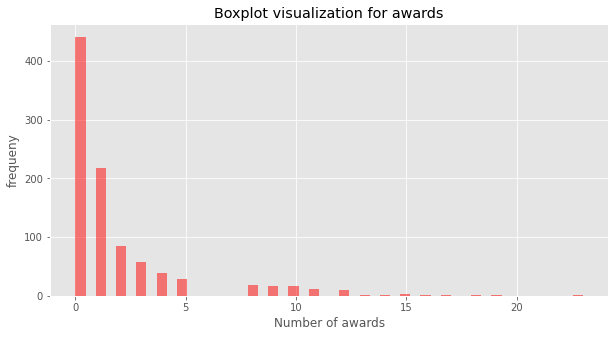

In [51]:
plt.figure();

df['award'].hist(color="r", alpha=0.5, bins=50,figsize=(10,5));
plt.xlabel('Number of awards')
plt.ylabel('frequeny')
plt.title('Boxplot visualization for awards')


Text(0.5, 1.0, 'Aggregation plot for awards')

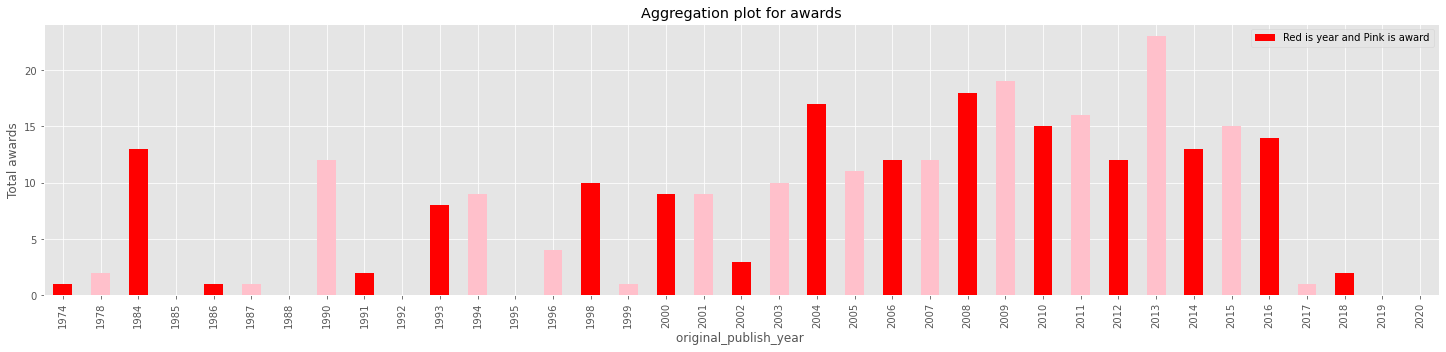

In [42]:
df.groupby('original_publish_year')['award'].agg('max','mean').plot(kind='bar' ,color=['r','pink'],legend='',figsize=(25,5))
plt.legend(loc='best')
plt.xlabel("original_publish_year ")
plt.ylabel("Total awards")
plt.title("Aggregation plot for awards")

<AxesSubplot:>

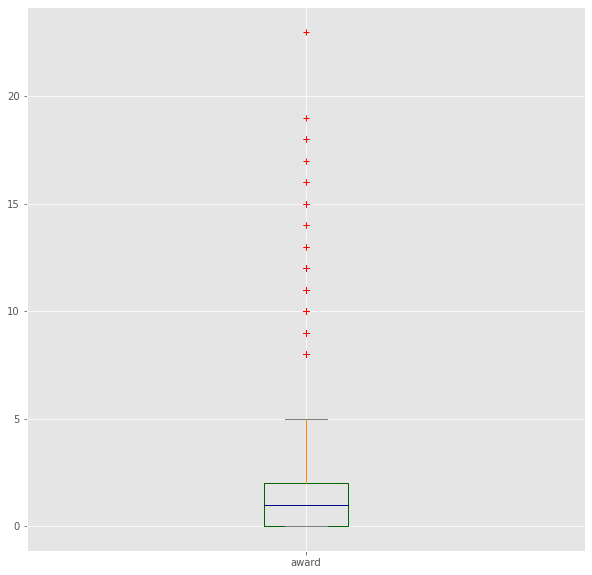

In [25]:
color = {
....: "boxes": "DarkGreen",
....: "whiskers": "DarkOrange",
....: "medians": "DarkBlue",
....: "caps": "Gray",
....: }
....:

df['award'].plot.box(color=color, sym="r+",figsize=(10,10))

9. Yesterday we asked you this:
    - "Group the books by `original_publish_year` and get the mean of the `minmax_norm_ratings` of the groups."
    - Now, make a **simple plot** to visualise the ratings w.r.t. the years!

<AxesSubplot:xlabel='original_publish_year'>

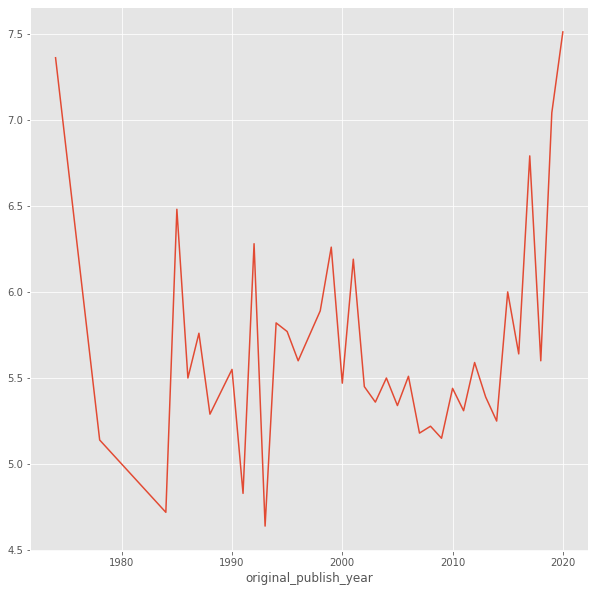

In [44]:
adf=df.groupby("original_publish_year")['minmax_norm_ratings'].mean().round(decimals=2)
adf.plot(kind='line' ,legend='',figsize=(10,10))

In [ ]:
# Need to to analyze part

10. Make a scatterplot to represent  `minmax_norm_ratings` in function of the number of awards won by the book.
    - Is there another representation that displays this in a more clear manner?
    - Optional: Can you plot a best fit linear regression line to represent the relationship?

In [60]:
b_df=df.sort_values(by=['award']).tail(25)
b_df

,title,author,num_rating,num_reviews,avg_rating,num_pages,original_publish_year,series,genres,award,minmax_norm_ratings,mean_norm_ratings
810,Scythe,Neal Shusterman,164568,25191,4.32,435,2016,True,"['Young Adult', 'Fantasy', 'Science Fiction Dy...",11,6.90,2.41
12,Cinder,Marissa Meyer,730362,56884,4.13,400,2012,True,"['Young Adult', 'Fantasy', 'Science Fiction', ...",12,5.91,1.43
941,All the Bright Places,Jennifer Niven,338326,34884,4.15,378,2015,False,"['Young Adult', 'Contemporary', 'Romance', 'Fi...",12,6.02,1.53
262,Blood Red Road,Moira Young,61404,5829,3.90,459,2011,True,"['Young Adult', 'Science Fiction Dystopia', 'F...",12,4.72,0.24
955,Illuminae,Amie Kaufman,125744,26263,4.27,602,2015,True,"['Science Fiction', 'Young Adult', 'Romance', ...",12,6.64,2.15
6,Shiver,Maggie Stiefvater,448203,23237,3.76,392,2009,True,"['Young Adult', 'Fantasy', 'Romance', 'Fantasy...",12,4.00,-0.49
143,Life As We Knew It,Susan Beth Pfeffer,120633,9883,3.87,337,2006,True,"['Young Adult', 'Science Fiction Dystopia', 'S...",12,4.57,0.08
121,The Raven Boys,Maggie Stiefvater,293258,32257,4.04,409,2012,True,"['Fantasy', 'Young Adult', 'Fantasy Paranormal...",12,5.45,0.96
70,Unwind,Neal Shusterman,202236,19135,4.16,337,2007,True,"['Young Adult', 'Science Fiction Dystopia', 'S...",12,6.07,1.58
419,Wintergirls,Laurie Halse Anderson,111098,9161,3.96,278,2009,False,"['Young Adult', 'Contemporary', 'Fiction', 'Re...",12,5.03,0.55


In [64]:
b=b_df['minmax_norm_ratings']
b

810    6.90
12     5.91
941    6.02
262    4.72
955    6.64
6      4.00
143    4.57
121    5.45
70     6.07
419    5.03
447    6.43
486    4.72
399    6.90
949    7.05
408    6.59
558    4.47
757    4.47
900    7.16
218    5.55
56     5.19
120    4.67
33     5.91
5      5.60
150    4.72
196    5.40
Name: minmax_norm_ratings, dtype: float64

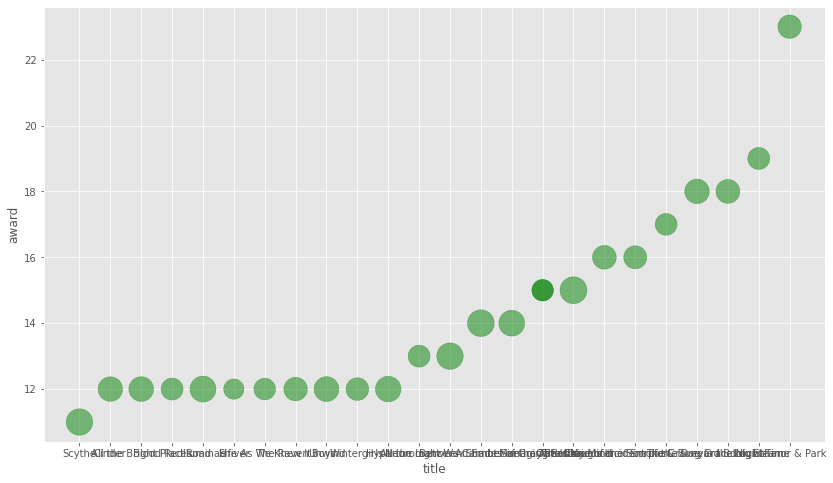

In [69]:
ax0=b_df.plot(kind='scatter',
                    x='title',
                    y='award',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=b * 100 + 10
                    
                   )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8aa7b630-9ed2-4356-9070-0a10a3a5f060' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>